# DEEPCAMP_P1B_ANALYSE_STATISTIQUE
### Objectif_Notebook : Analyse descriptive globale

## 1. Import 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. load data 

In [ ]:

df_X_station_train = pd.read_csv("/content/drive/MyDrive/Challenge_AI/LIVRAISON_FINALE/Partie1_Sans_Donnees_Meteo/X_station_train.csv")
df_X_station_train

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


In [ ]:
df_X_station_train.shape # dimension des données 

(4409474, 9)

In [ ]:
df_X_station_train["number_sta"].value_counts()

14066001    17520
56243001    17520
53185001    17520
56004001    17520
56007001    17520
            ...  
56081003     2058
36088005      477
35238800      286
86149001       79
86118001       77
Name: number_sta, Length: 267, dtype: int64

In [ ]:
df_X_station_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409474 entries, 0 to 4409473
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   number_sta  int64  
 1   date        object 
 2   ff          float64
 3   t           float64
 4   td          float64
 5   hu          float64
 6   dd          float64
 7   precip      float64
 8   Id          object 
dtypes: float64(6), int64(1), object(2)
memory usage: 302.8+ MB


## 3. NaN values  

In [ ]:
## créer un datframe qui va contenir le pourcentage et le nombre de NaN de chauqe variable 
df_number_na = pd.DataFrame(df_X_station_train.isnull().sum(), columns = ["number_na"])
# pourcentage 
df_number_na['pourcent_na'] = df_number_na["number_na"].apply(lambda x: (x/len(df_X_station_train))*100)
df_number_na.reset_index(inplace =True) # reset inde 
df_number_na.columns = ['Variable', 'number_na', 'pourcent_na']
df_number_na.sort_values(by='pourcent_na', ascending=False, inplace = True)
df_number_na

,Variable,number_na,pourcent_na
6,dd,1752650,39.747371
2,ff,1750817,39.705802
4,td,1428352,32.392798
5,hu,1425877,32.336669
7,precip,310298,7.037075
3,t,231013,5.239015
0,number_sta,0,0.000000
1,date,0,0.000000
8,Id,0,0.000000


* Vasulisation des pourcentage de NaN 

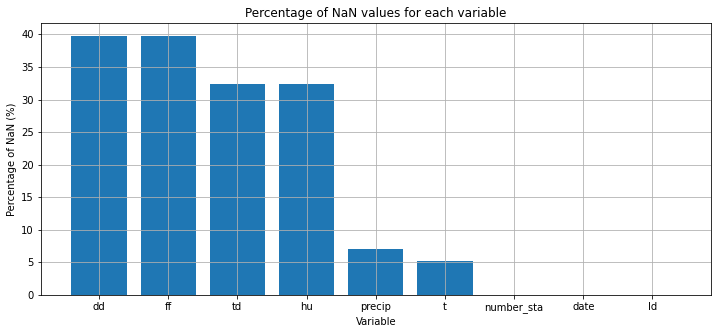

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 5))
 
plt.bar(df_number_na['Variable'], df_number_na['pourcent_na'].values)
 
plt.xlabel("Variable")
plt.ylabel("Percentage of NaN (%)")
plt.title("Percentage of NaN values for each variable")
plt.grid()
plt.show() 

## 3 Statistique Descriptive 

In [ ]:
stat_describ = df_X_station_train.describe().iloc[1: , :]
stat_describ.drop(columns = ['number_sta'], inplace=True)

### use style for the background 
cm = sns.light_palette("green", as_cmap=True)
stat_describ.style.background_gradient(cmap=cm)



,ff,t,td,hu,dd,precip
mean,3.773663,284.905957,281.340489,80.902381,192.057181,0.080940
std,2.598984,6.674721,5.270046,15.663812,94.703783,0.444065
min,0.000000,233.800000,222.350000,1.000000,0.000000,0.000000
25%,1.970000,280.320000,277.560000,71.600000,110.000000,0.000000
50%,3.260000,284.480000,281.640000,85.000000,212.000000,0.000000
75%,4.970000,289.300000,285.470000,93.600000,266.000000,0.000000
max,33.110000,325.070000,324.670000,100.000000,360.000000,61.000000


* histogramme de variables 

In [ ]:
df_numeric = df_X_station_train.drop(columns = ['number_sta'])


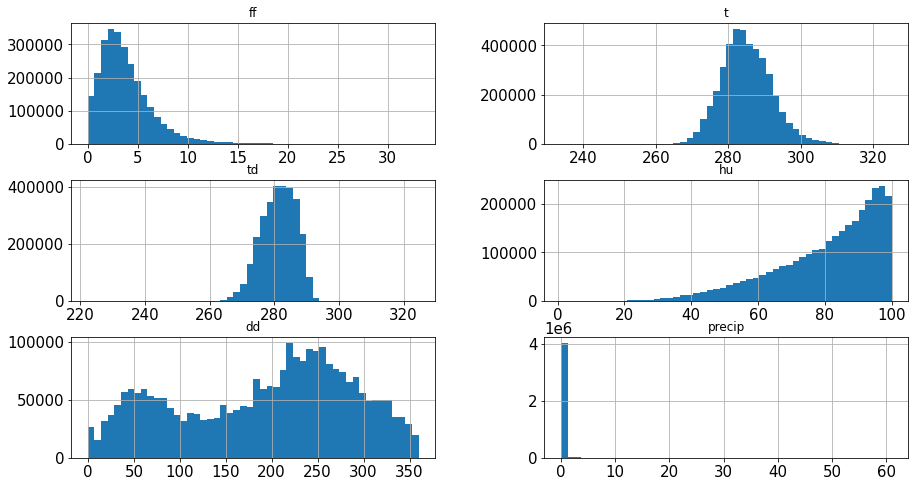

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

#### plot histograms 
df_numeric.hist(bins=50, figsize=(15,8))
plt.show()

## 4. Agrégation par jour et par station du dataframe x_station_train¶


In [ ]:
# convertir la date en type datatilme 
df_X_station_train['date'] = pd.to_datetime(df_X_station_train['date'])
# récupérer les l'année,le mois et le jour 
df_X_station_train['date_without_hour'] = df_X_station_train['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
# créer un nouveau id qui ignore les heurs 
df_X_station_train['Id'] = df_X_station_train['Id'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])
df_X_station_train

,number_sta,date,ff,t,td,hu,dd,precip,Id,date_without_hour
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0,2016-01-01
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0,2016-01-01
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0,2016-01-01
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0,2016-01-01
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729,2017-12-30
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729,2017-12-30
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729,2017-12-30
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729,2017-12-30


In [ ]:

### calcul des grandeur d'aggregation par jour et par station
df_X_station_train = df_X_station_train.groupby(['number_sta', 'date_without_hour', 'Id']).agg({'ff': ['min', 'max', 'mean', 'std', 'median'], 
                                                                     't': ['min', 'max', 'mean', 'std', 'median'], 
                                                                     'td': ['min', 'max', 'mean', 'std', 'median'], 
                                                                     'hu': ['min', 'max', 'mean', 'std', 'median'],
                                                                     'dd': ['min', 'max', 'mean', 'std', 'median'], 
                                                                     'precip': ['min', 'max', 'mean', 'std', 'median']
    
                                                                    })
df_X_station_train

ff                             \
                                            min    max      mean       std   
number_sta date_without_hour Id                                              
14066001   2016-01-01        14066001_0    2.26   6.04  3.913750  1.261548   
           2016-01-02        14066001_1    4.22  11.52  8.041250  2.125735   
           2016-01-03        14066001_2    2.88   8.32  5.430417  1.401284   
           2016-01-04        14066001_3    5.09   9.04  6.715417  1.143693   
           2016-01-05        14066001_4    3.86   8.04  5.957083  1.241792   
...                                         ...    ...       ...       ...   
95690001   2017-12-26        95690001_725  4.50  12.28  7.699167  1.966402   
           2017-12-27        95690001_726  4.11  12.49  8.134167  2.592839   
           2017-12-28        95690001_727  1.29   6.96  3.172500  1.459256   
           2017-12-29        95690001_728  1.26  10.86  6.341250  2.948950   
           2017-12-30        95690001_729  5.62  10.74  8.529583  1.349546   

                                                       t                      \
                                          median     min     max        mean   
number_sta date_without_hour Id                                                
14066001   2016-01-01        14066001_0    3.695  276.91  282.59  280.333750   
           2016-01-02        14066001_1    7.690  280.65  284.37  282.936667   
           2016-01-03        14066001_2    5.110  279.77  282.70  281.101667   
           2016-01-04        14066001_3    6.605  279.64  283.42  281.055000   
           2016-01-05        14066001_4    6.000  279.67  283.11  281.255833   
...                                          ...     ...     ...         ...   
95690001   2017-12-26        95690001_725  7.310  277.38  280.63  279.041667   
           2017-12-27        95690001_726  8.285  274.72  279.51  277.274583   
           2017-12-28        95690001_727  2.875  273.10  278.44  275.019583   
           2017-12-29        95690001_728  6.545  273.70  280.80  277.452500   
           2017-12-30        95690001_729  8.840  280.47  287.09  285.330833   

                                                              ...     dd  \
                                                std   median  ...    min   
number_sta date_without_hour Id                               ...          
14066001   2016-01-01        14066001_0    2.018238  281.325  ...  123.0   
           2016-01-02        14066001_1    1.012619  282.870  ...  138.0   
           2016-01-03        14066001_2    0.920801  280.745  ...  160.0   
           2016-01-04        14066001_3    1.366913  280.330  ...  200.0   
           2016-01-05        14066001_4    1.033323  281.185  ...  194.0   
...                                             ...      ...  ...    ...   
95690001   2017-12-26        95690001_725  1.008614  279.005  ...  170.0   
           2017-12-27        95690001_726  1.363101  277.110  ...  177.0   
           2017-12-28        95690001_727  1.570075  274.495  ...  221.0   
           2017-12-29        95690001_728  2.731512  278.760  ...  116.0   
           2017-12-30        95690001_729  2.115520  286.335  ...  182.0   

                                                                         \
                                             max        mean        std   
number_sta date_without_hour Id                                           
14066001   2016-01-01        14066001_0    200.0  146.500000  21.241878   
           2016-01-02        14066001_1    241.0  205.625000  29.331408   
           2016-01-03        14066001_2    252.0  195.250000  26.294734   
           2016-01-04        14066001_3    234.0  212.666667   7.833410   
           2016-01-05        14066001_4    213.0  205.041667   5.120115   
...                                          ...         ...        ...   
95690001   2017-12-26        95690001_725  259.0  202.333333  28.574337   
           2017-

In [ ]:
df_X_station_train.columns.to_flat_index()

Index([       ('ff', 'min'),        ('ff', 'max'),       ('ff', 'mean'),
              ('ff', 'std'),     ('ff', 'median'),         ('t', 'min'),
               ('t', 'max'),        ('t', 'mean'),         ('t', 'std'),
            ('t', 'median'),        ('td', 'min'),        ('td', 'max'),
             ('td', 'mean'),        ('td', 'std'),     ('td', 'median'),
              ('hu', 'min'),        ('hu', 'max'),       ('hu', 'mean'),
              ('hu', 'std'),     ('hu', 'median'),        ('dd', 'min'),
              ('dd', 'max'),       ('dd', 'mean'),        ('dd', 'std'),
           ('dd', 'median'),    ('precip', 'min'),    ('precip', 'max'),
         ('precip', 'mean'),    ('precip', 'std'), ('precip', 'median')],
      dtype='object')

In [ ]:
## joindre la chaque colonne et ses mesures calculées (par exemple ff_min)
df_X_station_train.columns = ['_'.join(column) for column in df_X_station_train.columns.to_flat_index()]
df_X_station_train.reset_index(inplace=True)
df_X_station_train

,number_sta,date_without_hour,Id,ff_min,ff_max,ff_mean,ff_std,ff_median,t_min,t_max,...,dd_min,dd_max,dd_mean,dd_std,dd_median,precip_min,precip_max,precip_mean,precip_std,precip_median
0,14066001,2016-01-01,14066001_0,2.26,6.04,3.913750,1.261548,3.695,276.91,282.59,...,123.0,200.0,146.500000,21.241878,142.0,0.0,0.2,0.008333,0.040825,0.0
1,14066001,2016-01-02,14066001_1,4.22,11.52,8.041250,2.125735,7.690,280.65,284.37,...,138.0,241.0,205.625000,29.331408,207.0,0.0,1.4,0.141667,0.325599,0.0
2,14066001,2016-01-03,14066001_2,2.88,8.32,5.430417,1.401284,5.110,279.77,282.70,...,160.0,252.0,195.250000,26.294734,198.0,0.0,2.4,0.487500,0.758323,0.0
3,14066001,2016-01-04,14066001_3,5.09,9.04,6.715417,1.143693,6.605,279.64,283.42,...,200.0,234.0,212.666667,7.833410,211.0,0.0,0.4,0.025000,0.089685,0.0
4,14066001,2016-01-05,14066001_4,3.86,8.04,5.957083,1.241792,6.000,279.67,283.11,...,194.0,213.0,205.041667,5.120115,206.5,0.0,0.4,0.016667,0.081650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183742,95690001,2017-12-26,95690001_725,4.50,12.28,7.699167,1.966402,7.310,277.38,280.63,...,170.0,259.0,202.333333,28.574337,202.0,0.0,1.8,0.100000,0.373002,0.0
183743,95690001,2017-12-27,95690001_726,4.11,12.49,8.134167,2.592839,8.285,274.72,279.51,...,177.0,310.0,251.500000,50.598161,276.5,0.0,1.4,0.133333,0.337080,0.0
183744,95690001,2017-12-28,95690001_727,1.29,6.96,3.172500,1.459256,2.875,273.10,278.44,...,221.0,295.0,253.583333,18.572810,250.5,0.0,0.0,0.000000,0.000000,0.0
183745,95690001,2017-12-29,95690001_728,1.26,10.86,6.341250,2.948950,6.545,273.70,280.80,...,116.0,282.0,211.500000,44.928929,210.0,0.0,1.8,0.183333,0.496655,0.0


## 5. Charger la variable à prédire 

In [ ]:
df_Y_train = pd.read_csv("/content/drive/MyDrive/Challenge_AI/LIVRAISON_FINALE/Partie1_Sans_Donnees_Meteo/Y_train.csv")
df_Y_train.head()

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0


In [ ]:
df_Y_train.shape # dimension 

(183747, 4)

## 6. Joindre les variables explicative et la variable à prédire 

In [ ]:
## Faire une jointure basé sur le id (numero da la station par jour) et par numéro de station 
df = pd.merge(df_X_station_train, df_Y_train, on = ['Id','number_sta'] , how = 'inner')
df

,number_sta,date_without_hour,Id,ff_min,ff_max,ff_mean,ff_std,ff_median,t_min,t_max,...,dd_mean,dd_std,dd_median,precip_min,precip_max,precip_mean,precip_std,precip_median,date,Ground_truth
0,14066001,2016-01-01,14066001_0,2.26,6.04,3.913750,1.261548,3.695,276.91,282.59,...,146.500000,21.241878,142.0,0.0,0.2,0.008333,0.040825,0.0,2016-01-02,3.4
1,14066001,2016-01-02,14066001_1,4.22,11.52,8.041250,2.125735,7.690,280.65,284.37,...,205.625000,29.331408,207.0,0.0,1.4,0.141667,0.325599,0.0,2016-01-03,11.7
2,14066001,2016-01-03,14066001_2,2.88,8.32,5.430417,1.401284,5.110,279.77,282.70,...,195.250000,26.294734,198.0,0.0,2.4,0.487500,0.758323,0.0,2016-01-04,0.6
3,14066001,2016-01-04,14066001_3,5.09,9.04,6.715417,1.143693,6.605,279.64,283.42,...,212.666667,7.833410,211.0,0.0,0.4,0.025000,0.089685,0.0,2016-01-05,0.4
4,14066001,2016-01-05,14066001_4,3.86,8.04,5.957083,1.241792,6.000,279.67,283.11,...,205.041667,5.120115,206.5,0.0,0.4,0.016667,0.081650,0.0,2016-01-06,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183724,95690001,2017-12-26,95690001_725,4.50,12.28,7.699167,1.966402,7.310,277.38,280.63,...,202.333333,28.574337,202.0,0.0,1.8,0.100000,0.373002,0.0,2017-12-27,3.2
183725,95690001,2017-12-27,95690001_726,4.11,12.49,8.134167,2.592839,8.285,274.72,279.51,...,251.500000,50.598161,276.5,0.0,1.4,0.133333,0.337080,0.0,2017-12-28,0.0
183726,95690001,2017-12-28,95690001_727,1.29,6.96,3.172500,1.459256,2.875,273.10,278.44,...,253.583333,18.572810,250.5,0.0,0.0,0.000000,0.000000,0.0,2017-12-29,4.4
183727,95690001,2017-12-29,95690001_728,1.26,10.86,6.341250,2.948950,6.545,273.70,280.80,...,211.500000,44.928929,210.0,0.0,1.8,0.183333,0.496655,0.0,2017-12-30,5.4


## 7. Charger les coordonnées des stations 

In [ ]:
df_station_coord = pd.read_csv('/content/drive/MyDrive/Challenge_AI/LIVRAISON_FINALE/Partie1_Sans_Donnees_Meteo/stations_coordinates.csv')
df_station_coord.head()

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0


In [ ]:
df_station_coord.isnull().sum() ## null values 

number_sta    0
lat           0
lon           0
height_sta    0
dtype: int64

* Joindre avec les coordonnées des stations 

In [ ]:
## jointure sur le numéro de la stations 
df = pd.merge(df, df_station_coord, on = 'number_sta', how = 'left')
df

,number_sta,date_without_hour,Id,ff_min,ff_max,ff_mean,ff_std,ff_median,t_min,t_max,...,precip_min,precip_max,precip_mean,precip_std,precip_median,date,Ground_truth,lat,lon,height_sta
0,14066001,2016-01-01,14066001_0,2.26,6.04,3.913750,1.261548,3.695,276.91,282.59,...,0.0,0.2,0.008333,0.040825,0.0,2016-01-02,3.4,49.334,-0.431,2.0
1,14066001,2016-01-02,14066001_1,4.22,11.52,8.041250,2.125735,7.690,280.65,284.37,...,0.0,1.4,0.141667,0.325599,0.0,2016-01-03,11.7,49.334,-0.431,2.0
2,14066001,2016-01-03,14066001_2,2.88,8.32,5.430417,1.401284,5.110,279.77,282.70,...,0.0,2.4,0.487500,0.758323,0.0,2016-01-04,0.6,49.334,-0.431,2.0
3,14066001,2016-01-04,14066001_3,5.09,9.04,6.715417,1.143693,6.605,279.64,283.42,...,0.0,0.4,0.025000,0.089685,0.0,2016-01-05,0.4,49.334,-0.431,2.0
4,14066001,2016-01-05,14066001_4,3.86,8.04,5.957083,1.241792,6.000,279.67,283.11,...,0.0,0.4,0.016667,0.081650,0.0,2016-01-06,3.0,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183724,95690001,2017-12-26,95690001_725,4.50,12.28,7.699167,1.966402,7.310,277.38,280.63,...,0.0,1.8,0.100000,0.373002,0.0,2017-12-27,3.2,49.108,1.831,126.0
183725,95690001,2017-12-27,95690001_726,4.11,12.49,8.134167,2.592839,8.285,274.72,279.51,...,0.0,1.4,0.133333,0.337080,0.0,2017-12-28,0.0,49.108,1.831,126.0
183726,95690001,2017-12-28,95690001_727,1.29,6.96,3.172500,1.459256,2.875,273.10,278.44,...,0.0,0.0,0.000000,0.000000,0.0,2017-12-29,4.4,49.108,1.831,126.0
183727,95690001,2017-12-29,95690001_728,1.26,10.86,6.341250,2.948950,6.545,273.70,280.80,...,0.0,1.8,0.183333,0.496655,0.0,2017-12-30,5.4,49.108,1.831,126.0


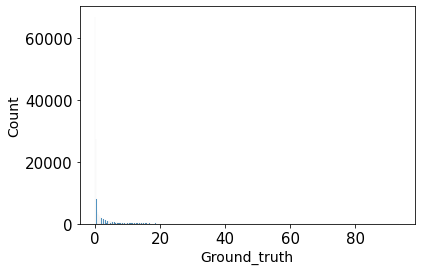

In [ ]:
ax = sns.histplot(data=df, x = 'Ground_truth')

In [ ]:
df['Ground_truth'].describe()

count    162107.000000
mean          1.948453
std           4.190966
min           0.000000
25%           0.000000
50%           0.200000
75%           1.800000
max          93.500000
Name: Ground_truth, dtype: float64

## 8. Visualisations

In [ ]:
df.columns 

Index(['number_sta', 'date_without_hour', 'Id', 'ff_min', 'ff_max', 'ff_mean',
       'ff_std', 'ff_median', 't_min', 't_max', 't_mean', 't_std', 't_median',
       'td_min', 'td_max', 'td_mean', 'td_std', 'td_median', 'hu_min',
       'hu_max', 'hu_mean', 'hu_std', 'hu_median', 'dd_min', 'dd_max',
       'dd_mean', 'dd_std', 'dd_median', 'precip_min', 'precip_max',
       'precip_mean', 'precip_std', 'precip_median', 'date', 'Ground_truth',
       'lat', 'lon', 'height_sta'],
      dtype='object')

In [ ]:
numeric = ['ff_min', 'ff_max', 'ff_mean', 'ff_std', 'ff_median', 't_min', 't_max', 't_mean', 't_std', 't_median',
           'td_min', 'td_max', 'td_mean', 'td_std', 'td_median', 'hu_min','hu_max', 'hu_mean', 'hu_std', 'hu_median', 
           'dd_min', 'dd_max','dd_mean', 'dd_std', 'dd_median', 'precip_min', 'precip_max',
           'precip_mean', 'precip_std', 'precip_median', 'Ground_truth']



In [ ]:
import seaborn as sns
sns.set(style='darkgrid', context='notebook', palette='deep', rc={'figure.figsize':(10,8)})

In [ ]:
station = df[[*numeric]].copy()
corr_matrix = station.corr()
corr_matrix["Ground_truth"].sort_values(ascending=False)

Ground_truth     1.000000
precip_mean      0.237089
precip_std       0.227707
precip_max       0.214185
ff_max           0.191613
ff_mean          0.170473
ff_median        0.167757
ff_std           0.142782
dd_min           0.132647
ff_min           0.130181
precip_median    0.095868
dd_mean          0.091170
hu_min           0.089525
hu_mean          0.087409
dd_median        0.077643
hu_median        0.075367
hu_max           0.045071
dd_max           0.020144
precip_min       0.012731
td_max          -0.000379
td_min          -0.000873
td_std          -0.002249
td_mean         -0.003937
td_median       -0.003937
t_min           -0.005172
t_median        -0.036286
t_mean          -0.046800
t_max           -0.076593
hu_std          -0.092309
dd_std          -0.092447
t_std           -0.123612
Name: Ground_truth, dtype: float64

#### 8.1 Création des matric regplot (nuage des points de corrélations). Elle donne une visualisation sur la coorélation entre deux variables. 

CPU times: user 9min 58s, sys: 7min, total: 16min 58s
Wall time: 8min 53s


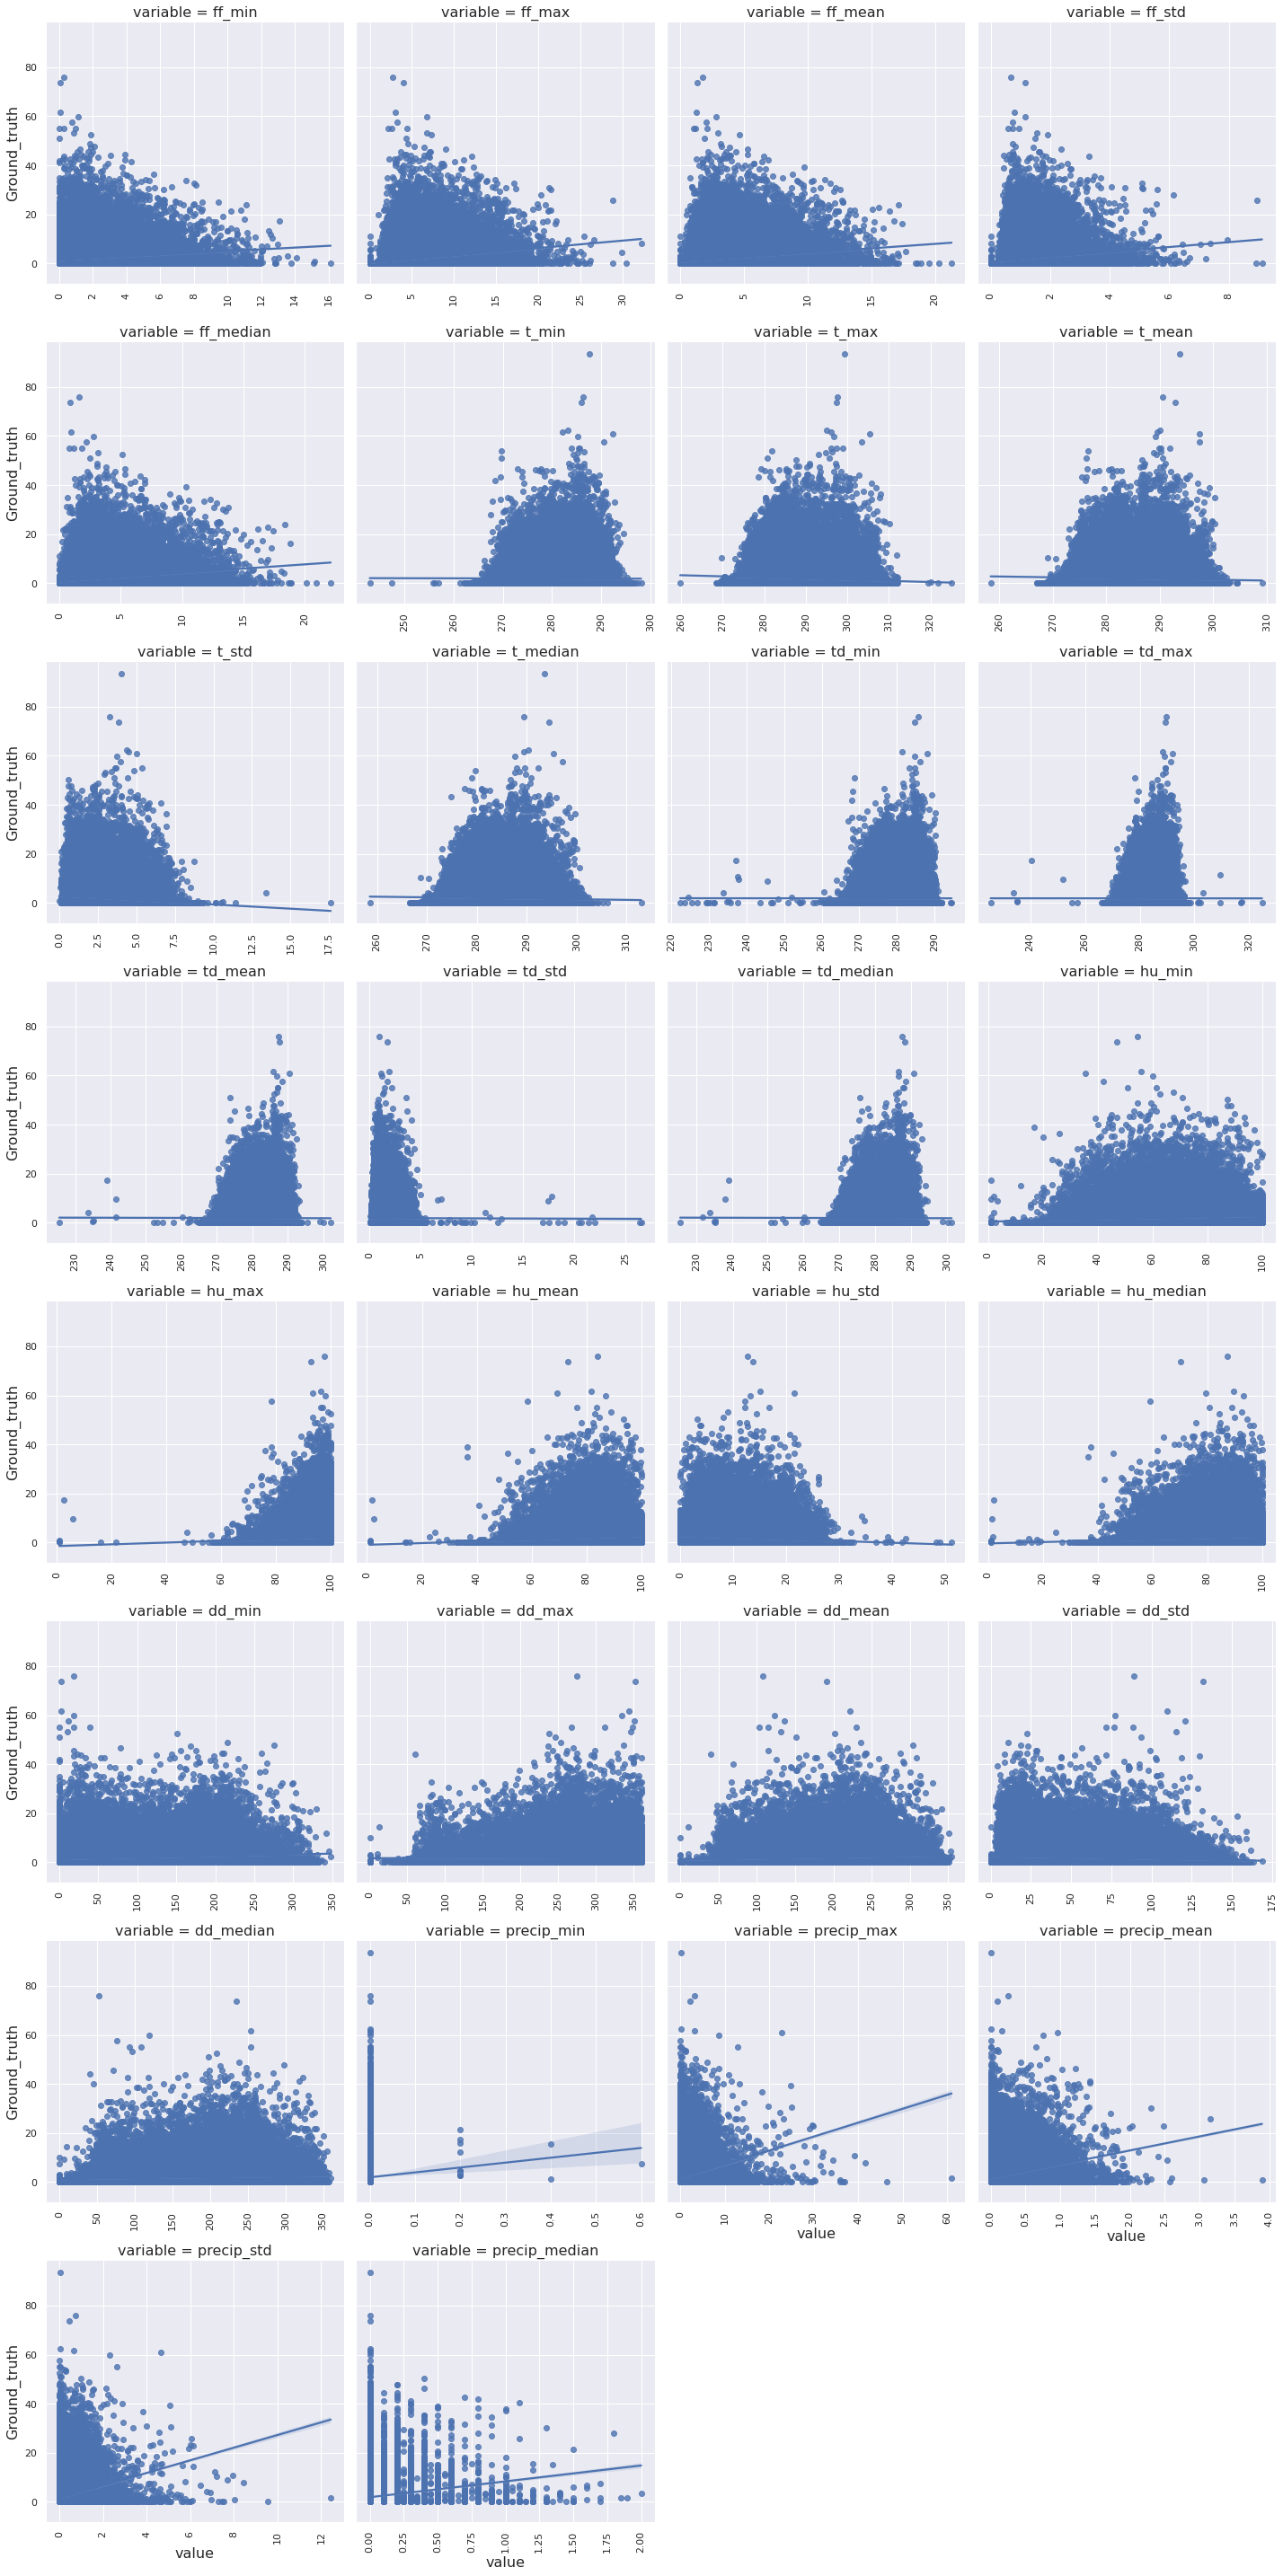

In [ ]:
%%time 
sns.set(style='darkgrid', context='notebook', palette='deep', rc={'figure.figsize':(10, 8)})
mpl.rc('axes', labelsize=16)

def scatterplot(x,y,**kwargs):
    sns.regplot(x=x,y=y)
    _=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['Ground_truth'], value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=True, height=5)
g = g.map(scatterplot, "value", "Ground_truth") 


In [ ]:
numeric_ = ['precip_max','precip_mean', 'precip_std', 'ff_max', 'ff_mean', 'ff_median', 'ff_std', 
           't_std', 'Ground_truth']

#### 8.2  Top des 8 variables les plus coorélées 

CPU times: user 2min 41s, sys: 1min 56s, total: 4min 37s
Wall time: 2min 23s


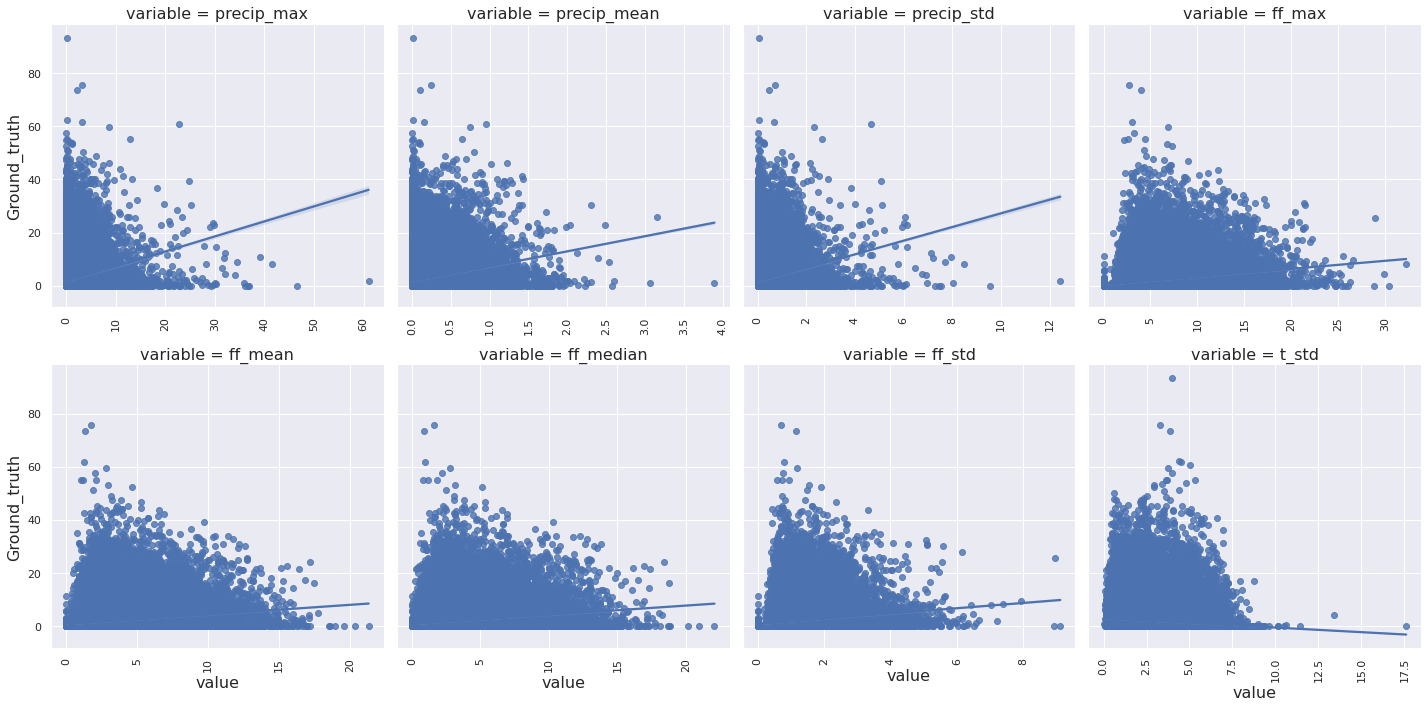

In [ ]:
%%time 
def scatterplot(x,y,**kwargs):
    sns.regplot(x=x,y=y); 
    _=plt.xticks(rotation=90); 
    
f = pd.melt(df, id_vars=['Ground_truth'], value_vars=numeric_)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=True, height=5)
g = g.map(scatterplot, "value", "Ground_truth"); 

#### 8.3 Matrice de coorélation 

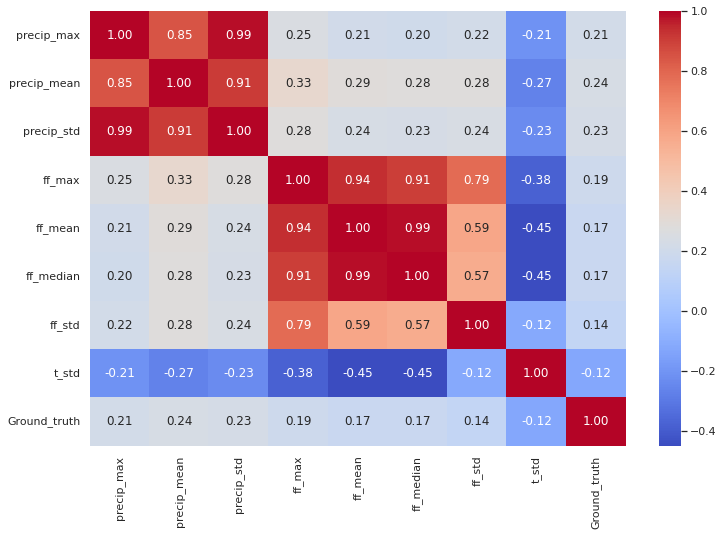

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))     
g = sns.heatmap(station[[*numeric_]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### 8.4 Joinplot 

CPU times: user 3min 46s, sys: 2min 18s, total: 6min 4s
Wall time: 3min 24s


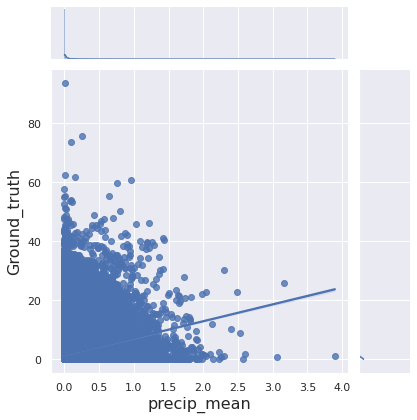

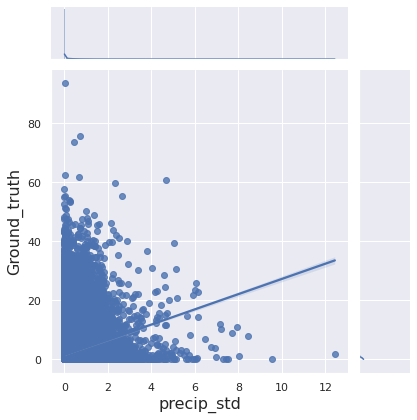

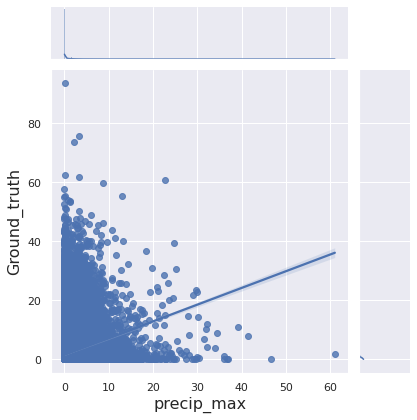

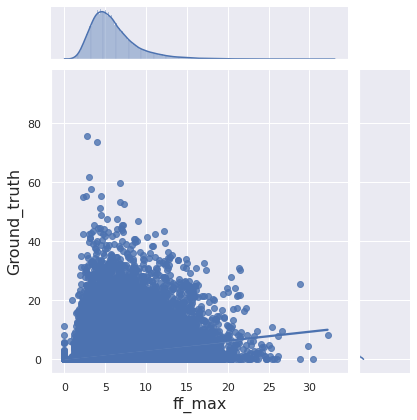

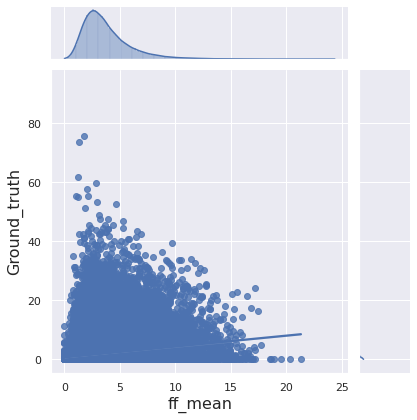

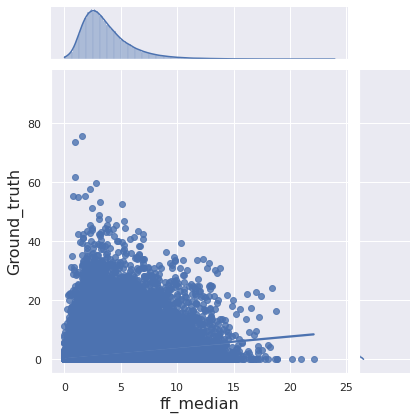

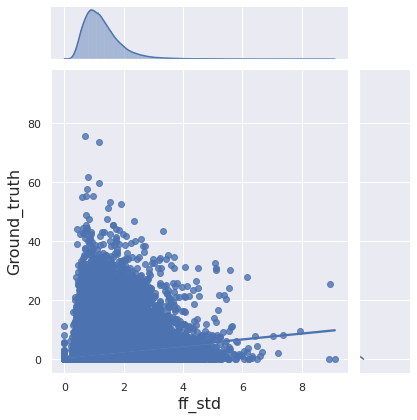

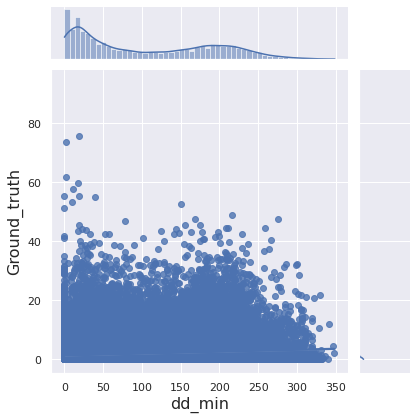

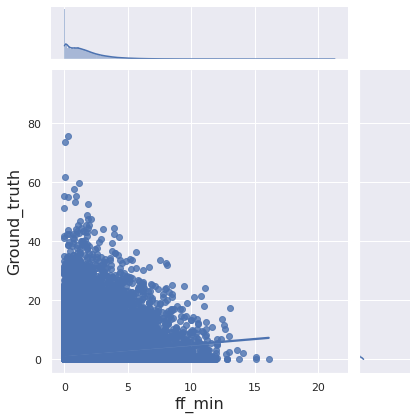

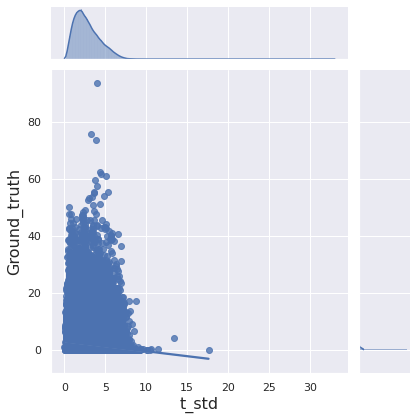

In [ ]:
%%time 

sns.jointplot(data = station, x="precip_mean",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="precip_std",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="precip_max",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="ff_max",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="ff_mean",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="ff_median",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="ff_std",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="dd_min",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="ff_min",y="Ground_truth", kind='reg');
sns.jointplot(data = station, x="t_std",y="Ground_truth", kind='reg');

In [ ]:
station = df[[*numeric]].copy()
corr_matrix = station.corr()
corr_matrix["Ground_truth"].sort_values(ascending=False)

Ground_truth     1.000000
precip_mean      0.237089
precip_std       0.227707
precip_max       0.214185
ff_max           0.191613
ff_mean          0.170473
ff_median        0.167757
ff_std           0.142782
dd_min           0.132647
ff_min           0.130181
precip_median    0.095868
dd_mean          0.091170
hu_min           0.089525
hu_mean          0.087409
dd_median        0.077643
hu_median        0.075367
hu_max           0.045071
dd_max           0.020144
precip_min       0.012731
td_max          -0.000379
td_min          -0.000873
td_std          -0.002249
td_mean         -0.003937
td_median       -0.003937
t_min           -0.005172
t_median        -0.036286
t_mean          -0.046800
t_max           -0.076593
hu_std          -0.092309
dd_std          -0.092447
t_std           -0.123612
Name: Ground_truth, dtype: float64

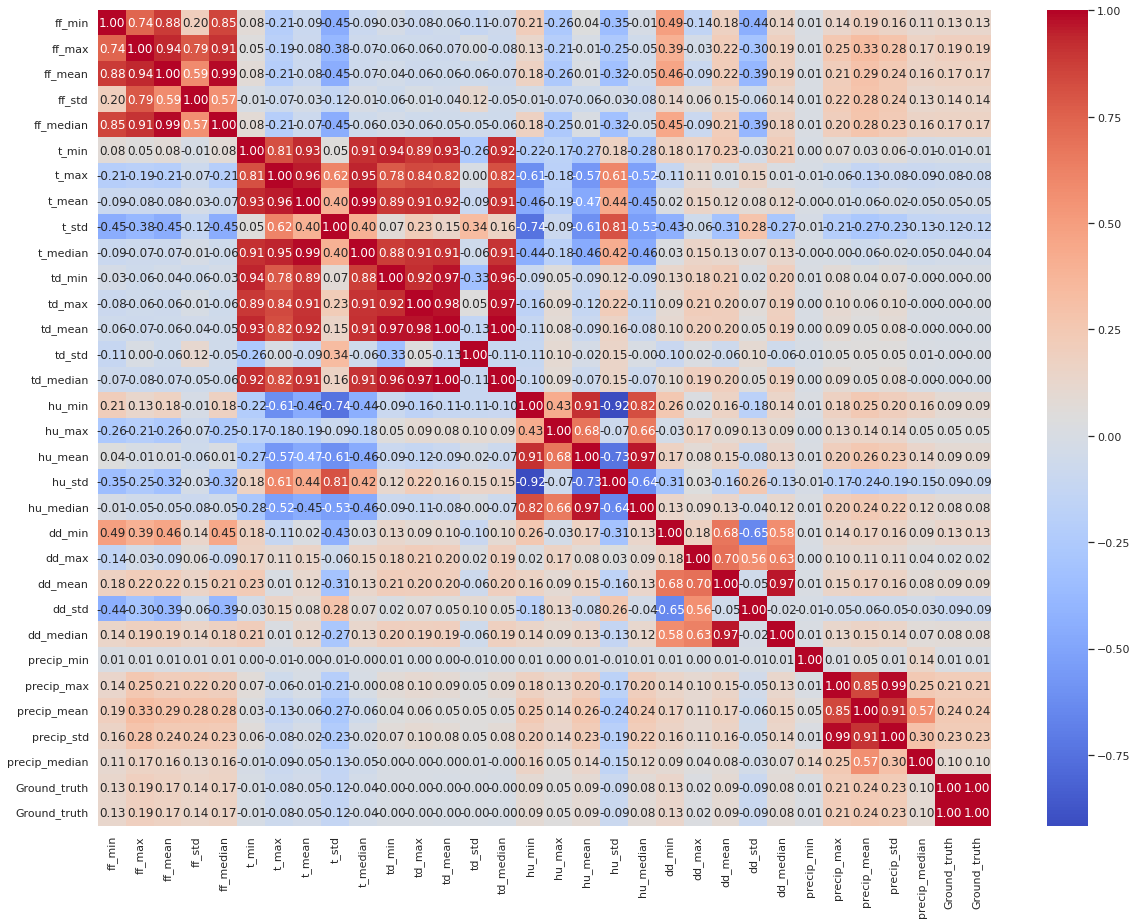

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))     
g = sns.heatmap(station[[*numeric,'Ground_truth']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")